In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Exploring data

In [2]:
df = pd.read_csv("/kaggle/input/applicant-details-for-loan-approve/Applicant-details.csv")

In [3]:
df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [4]:
df.drop("Applicant_ID", axis=1, inplace=True)
df.drop("Residence_City", axis=1, inplace=True)

In [5]:
df.shape

(100000, 11)

# EDA

In [6]:
categoricals = ["Marital_Status", "House_Ownership", "Vehicle_Ownership(car)", "Occupation",
                "Residence_State", "Loan_Default_Risk"]

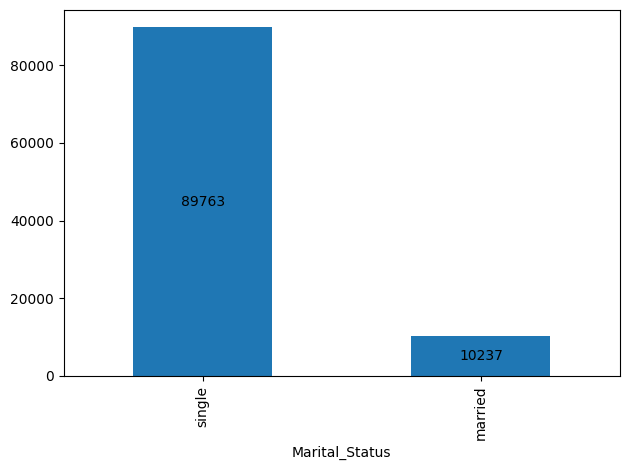

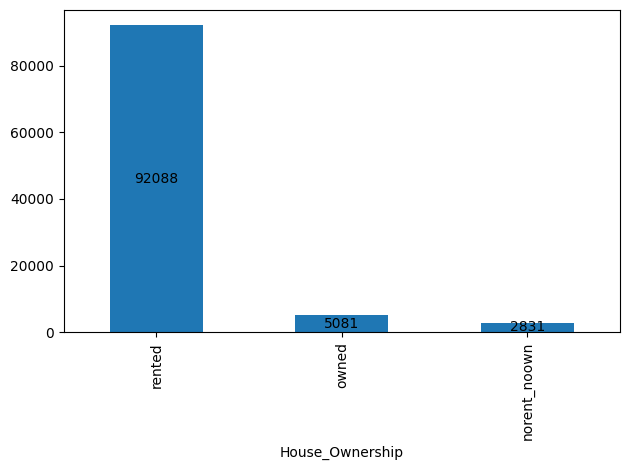

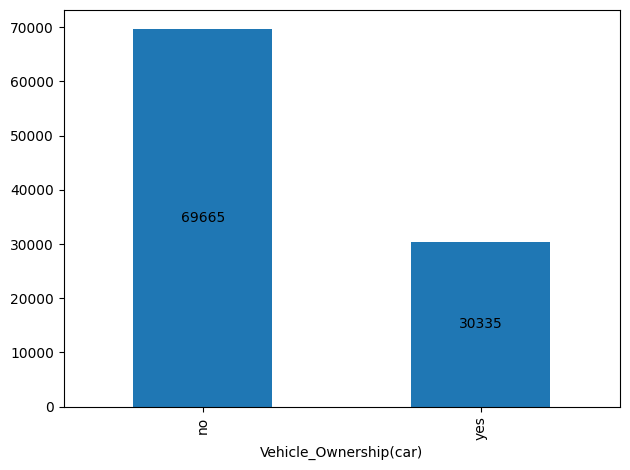

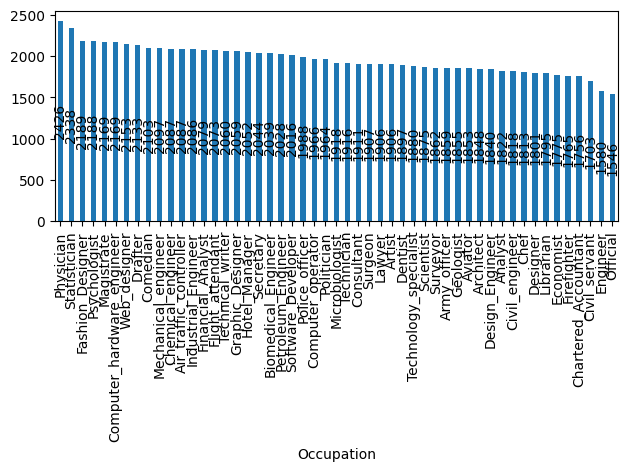

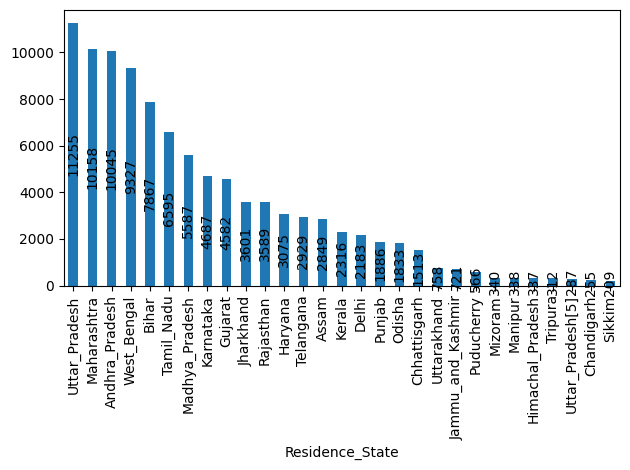

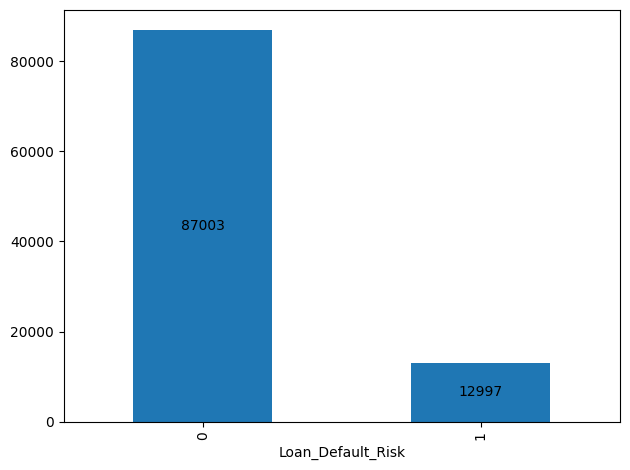

In [7]:
for i in categoricals:    
    counts = df[i].value_counts()
    fig, axes = plt.subplots()
    counts.plot(kind="bar", ax=axes)
    rotate = 0 if len(counts) < 5 else 90
    for container in axes.containers:
        axes.bar_label(container, label_type="center", rotation=rotate)
        
    plt.tight_layout()
    plt.show()

In [8]:
numericals = []
for i in df.columns:
    if i not in categoricals:
        numericals += [i]

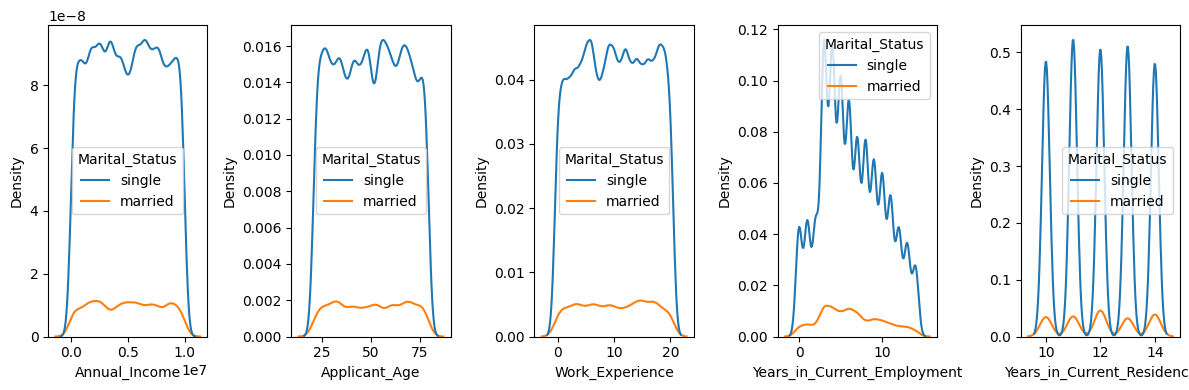

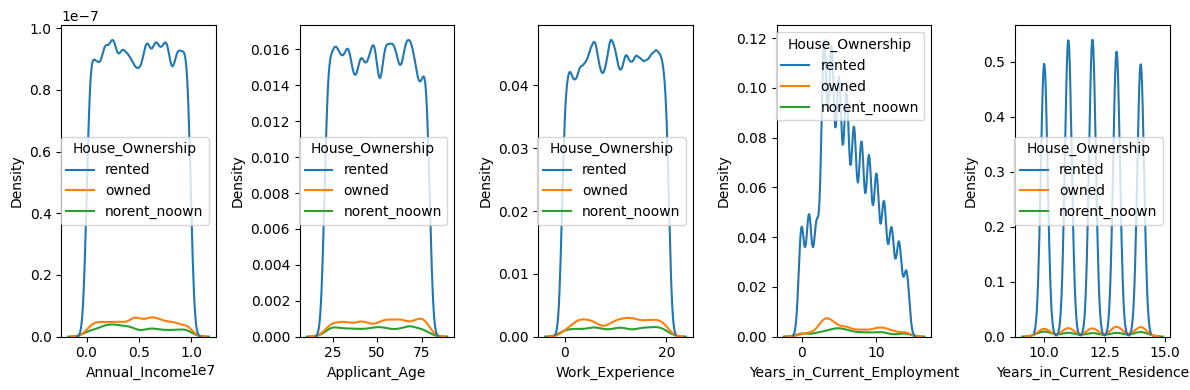

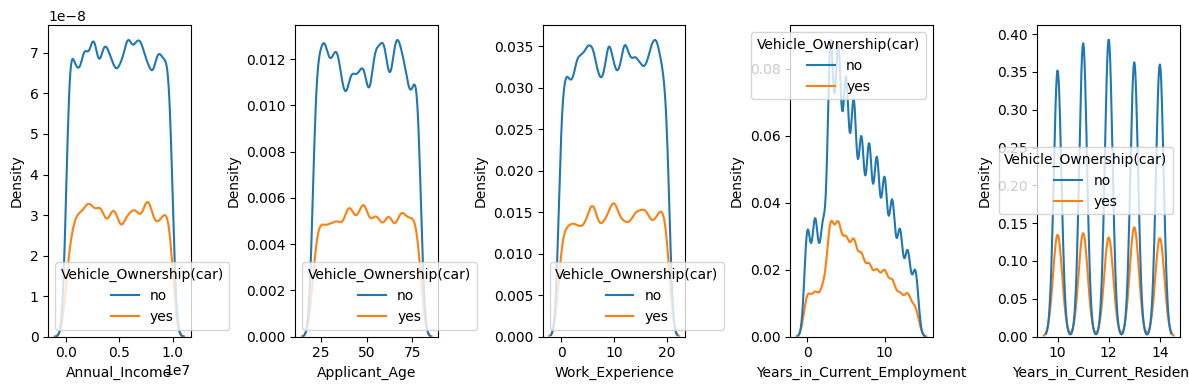

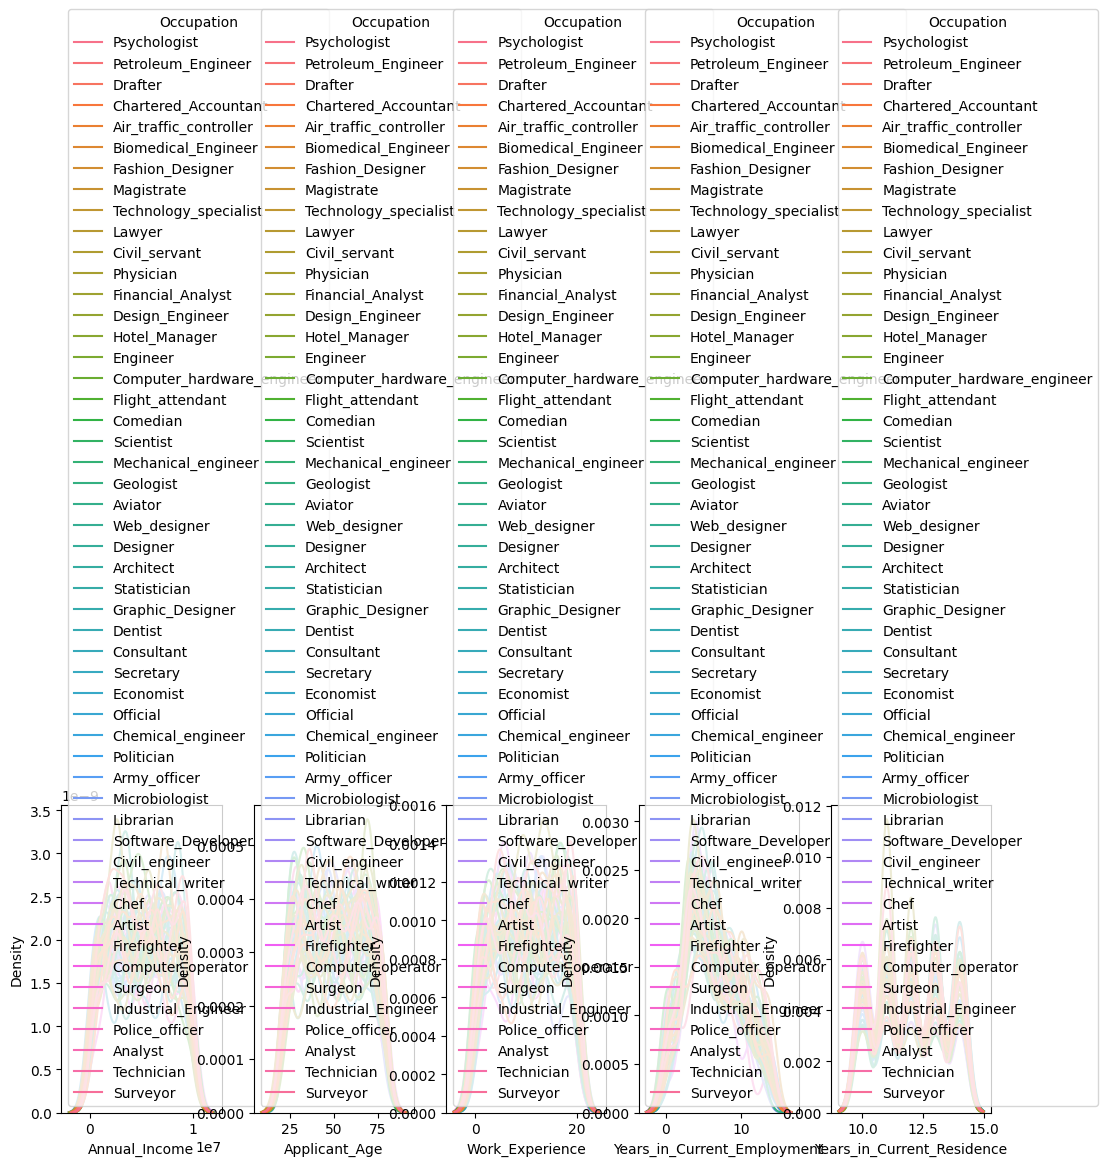

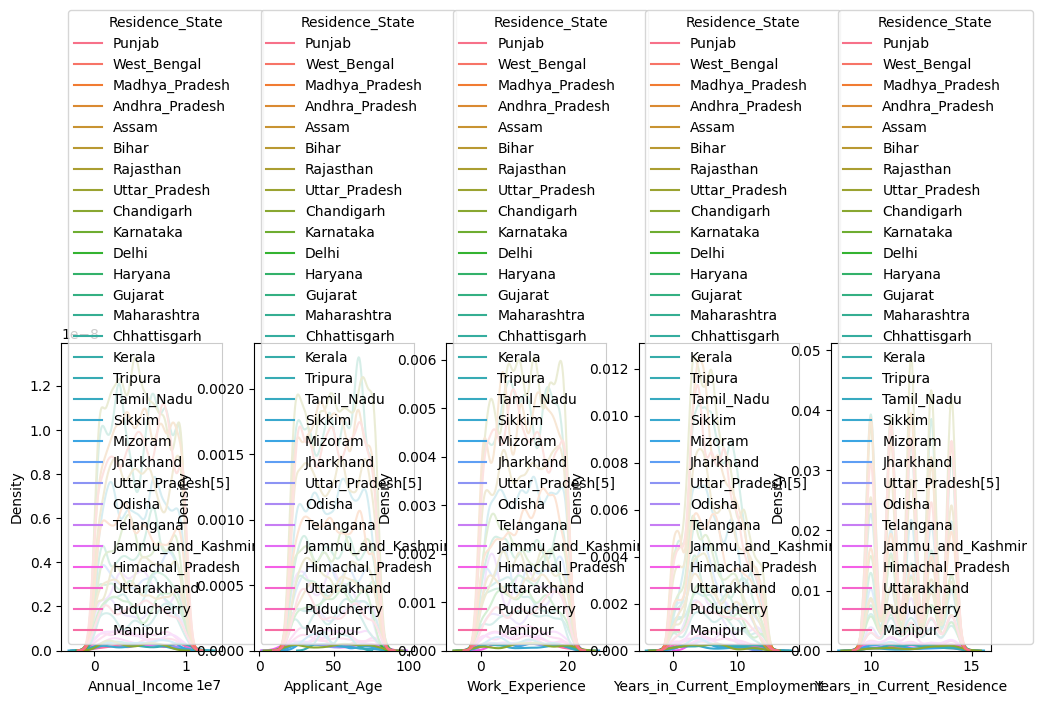

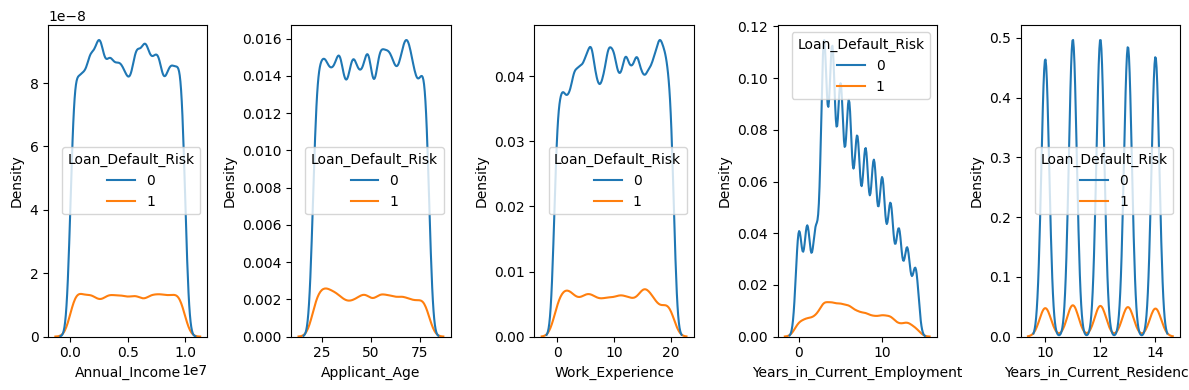

In [9]:
for i in categoricals:
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
    for j, k in enumerate(numericals):
        sns.kdeplot(df, x=k, hue=i, ax=axes[j])
    plt.tight_layout()
    plt.show()

# Encoding values

In [10]:
le = LabelEncoder()

for i in categoricals[:-1]:
    df[i] = le.fit_transform(df[i])

# Scaling values

In [11]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Dealing with class imablances

In [12]:
smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

In [13]:
def training(model, name, ax):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_title("{}: {}%".format(name, round(score*100, 2)))
    return report

# Defining and finetuning models

In [14]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(learning_rate=0.9)
gbc = GradientBoostingClassifier(learning_rate=0.9)
etc = ExtraTreesClassifier()
lgr = LogisticRegression(C=0.9)
gnb = GaussianNB()
xgb = XGBClassifier(learning_rate=0.9)

models = [rfc, abc, gbc, etc, lgr, gnb, xgb]
names = ["Random Forest", "Ada Boost", "Gradient Boosting",
        "Extra Trees", "Logistic Regression", "Naive Bayes",
        "XGB"]

# Models results

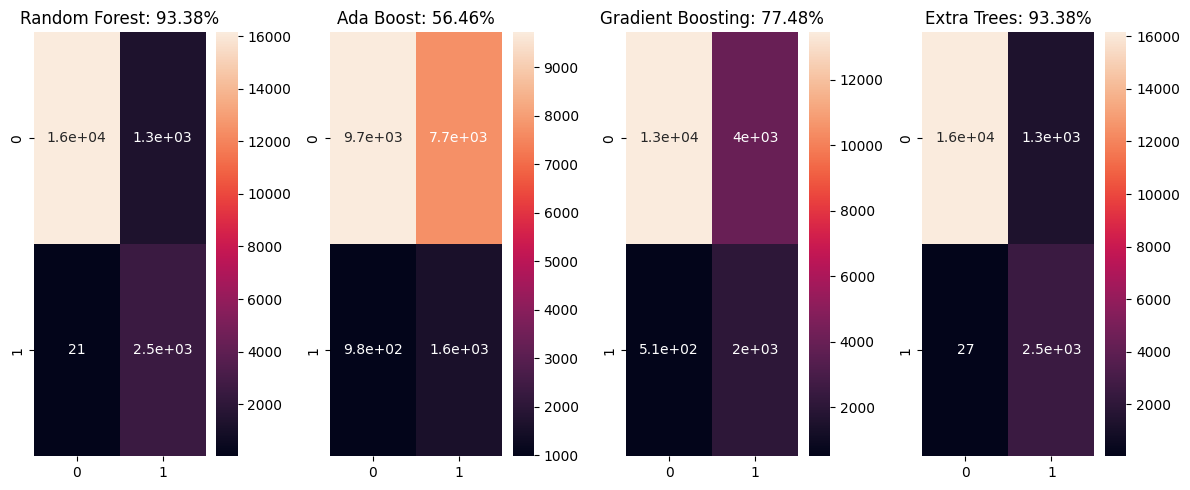

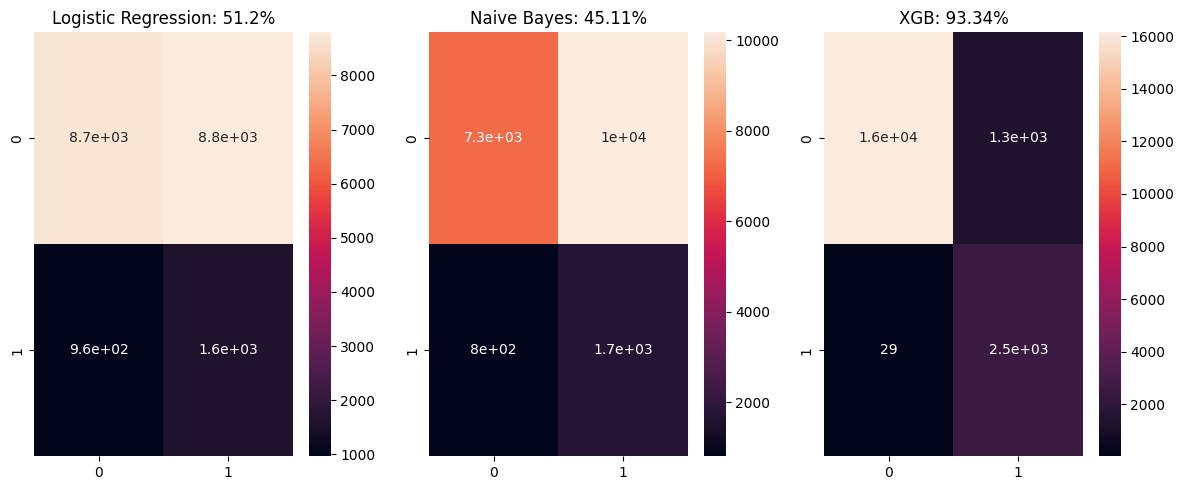

In [15]:
dd = dict()
index = 0
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
for i in range(4):
    reports = training(models[index], names[index], axes[i])
    dd[names[index]] = reports
    index += 1
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
for i in range(3):
    reports = training(models[index], names[index], axes[i])
    dd[names[index]] = reports
    index += 1
    
plt.tight_layout()
plt.show()

In [16]:
for i, j in dd.items():
    print("*"*50)
    print(i)
    print(j)
    print()

**************************************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     17447
           1       0.66      0.99      0.79      2553

    accuracy                           0.93     20000
   macro avg       0.83      0.96      0.88     20000
weighted avg       0.96      0.93      0.94     20000


**************************************************
Ada Boost
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     17447
           1       0.17      0.62      0.27      2553

    accuracy                           0.56     20000
   macro avg       0.54      0.59      0.48     20000
weighted avg       0.81      0.56      0.64     20000


**************************************************
Gradient Boosting
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     17447
           1       0.34      0.80      0